# Linear Regression Model 3
A mix of platform creator, publisher, genre, and a particular sales region to predict global sales

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('../Data/preprocessed_vgsales.csv')

### Training and testing a model on each sales region
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

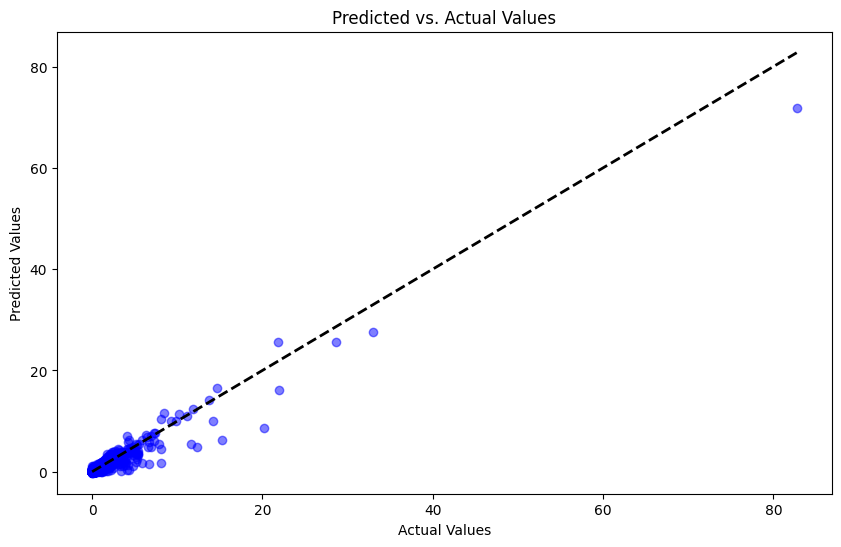

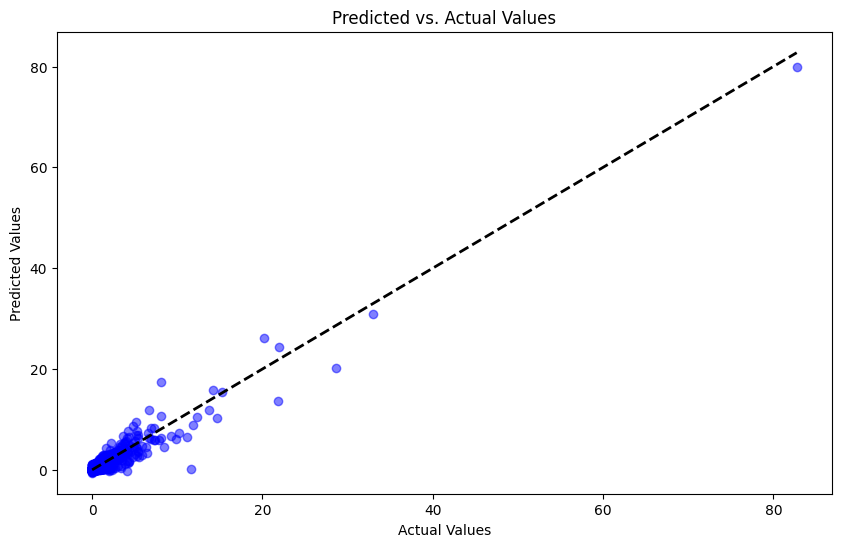

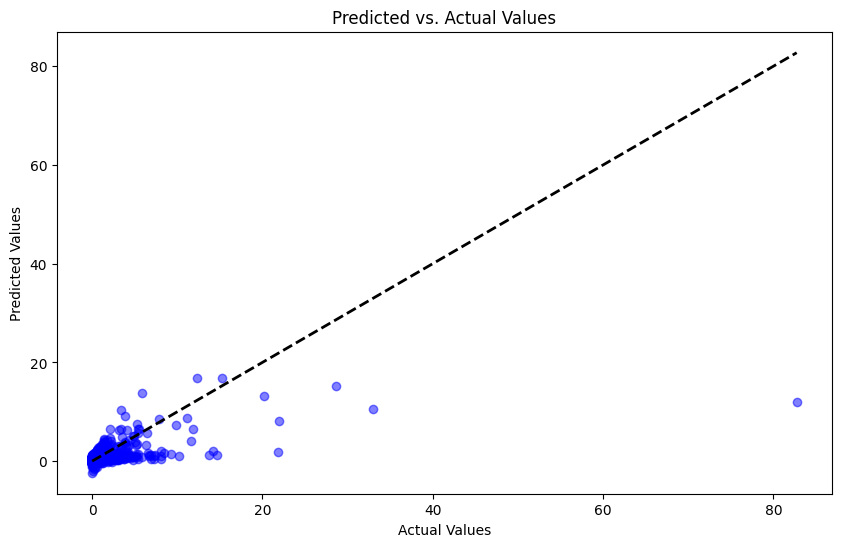

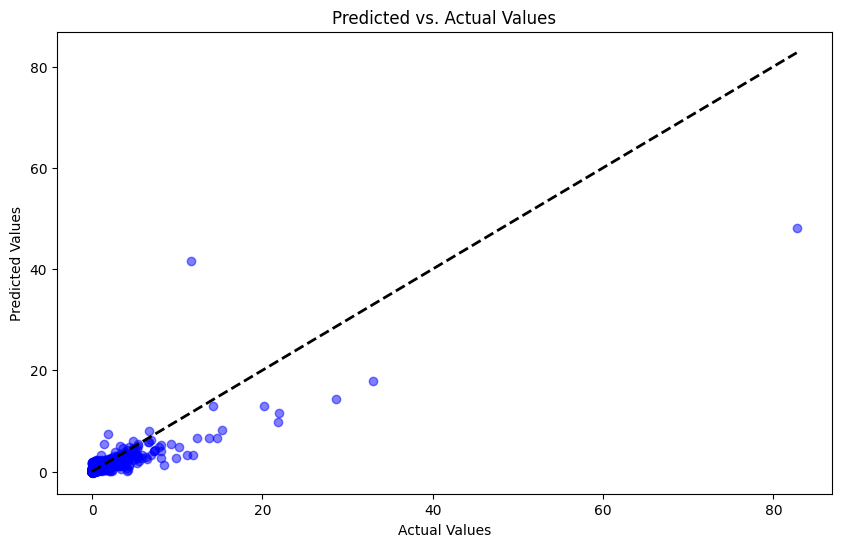

In [3]:
y_mixed = data['Global_Sales']

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

model_performance = {}

# Loop over each region, build and evaluate a model
for region in regions:
    # Selecting features for the current iteration
    X_current = data[['Platform_Creator', 'Publisher', 'Genre', region]]
    
    # Splitting the dataset into training and test sets for the current iteration
    X_train_current, X_test_current, y_train_current, y_test_current = train_test_split(
        X_current, y_mixed, test_size=0.2, random_state=42)
    
    # Creating and fitting the model for the current region
    current_pipeline = Pipeline([
        ('transformer', ColumnTransformer([
            ('ohe', OneHotEncoder(handle_unknown='ignore'), ['Platform_Creator', 'Publisher', 'Genre'])
        ], remainder='passthrough')),
        ('regressor', LinearRegression())
    ])
    
    current_pipeline.fit(X_train_current, y_train_current)
    
    y_pred_current = current_pipeline.predict(X_test_current)
    mse_current = mean_squared_error(y_test_current, y_pred_current)
    r2_current = r2_score(y_test_current, y_pred_current)
    
    # Storing the performance metrics
    model_performance[region] = {'MSE': mse_current, 'R2': r2_current}

    # Creating the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_current, y_pred_current, alpha=0.5, color='blue')
    plt.title('Predicted vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plotting the identity line
    plt.plot([y_test_current.min(), y_test_current.max()], [y_test_current.min(), y_test_current.max()], 'k--', lw=2) 
    plt.show()


# Outputting each models performance

In [4]:
model_performance

{'NA_Sales': {'MSE': 0.3167946430103099, 'R2': 0.9259473980411888},
 'EU_Sales': {'MSE': 0.3432260750207864, 'R2': 0.9197688961092305},
 'JP_Sales': {'MSE': 2.779937201352593, 'R2': 0.35017340859657253},
 'Other_Sales': {'MSE': 1.2805957923733235, 'R2': 0.7006532383829989}}